## Udacity Data Analyst Nanodegree
## Analyze A/B Test Results

by Tia Qin

June 2020

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read in the dataset
df = pd.read_csv('/Users/tqin/Desktop/Tia Qin/Data Analyst Nanodegree/Project3_A:B Test/AnalyzeABTestResults 2/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#number of unique users in the dataset
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#number of times the new_page and treatment don't line up
df.query('landing_page == "new_page" and group != "treatment"')['user_id'].count()+df.query('landing_page != "new_page" and group == "treatment"')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [7]:
#find missing values
df.isnull().sum().any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#remove rows where the landing_page and group columns don't match
df2 = df.copy()
indexNames1 = df.query('landing_page == "new_page" and group != "treatment"').index
indexNames2 = df.query('landing_page != "new_page" and group == "treatment"').index
df2.drop(indexNames1, inplace=True)
df2.drop(indexNames2, inplace=True)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#number of unique user_ids in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#repeated user_id in df2
df2[df2.duplicated(subset='user_id', keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#row info for the repeat user_id
df2[df2.duplicated(subset='user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset ="user_id", inplace=True) 

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#probability of an individual converting regardless of the page they receive
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#probability of converting given an individual was in the control group
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#probability of converting given an individual was in the treatment group
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
#probability of receiving the new page
df2.query('landing_page == "new_page"')['user_id'].count()/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**There seems not sufficient evidence to say that the new treatment page leads to more conversions. Because:**
- The probability of converting given an individual was in the control group (0.1204) is higher than the probability of converting given an individual was in the treatment group (0.1188), which is supporting the conclusion that the old treatment page leads to more conversions.
- We still need to determine whether there is enough statistical evidence to say that the old page leads to more conversions, not due to chance, which requires performing hypothesis testing.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**\begin{equation*} H_{0}: p_{new} - p_{old} \leq 0 \end{equation*}**<br>
**\begin{equation*} H_{1}: p_{new} - p_{old} > 0 \end{equation*}**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#convert rate for p_new under the null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
#convert rate for p_old under the null
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
#calculate n_new
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$?

In [21]:
#calculate n_old
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#simulate n_new transactions with a convert rate of p_new under the null
new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, 1 - p_new])
new_page_converted

array([1, 1, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#simulate n_old transactions with a convert rate of p_old under the null
old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, 1 - p_old])
old_page_converted

array([1, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#find difference between p_new and p_old
new_page_converted.mean() - old_page_converted.mean()

-0.0009175773418157313

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
#simulate 10,000 p_new - p_old values
new_page_converted_bs = np.random.binomial(n_new, p_new, 10000) / n_new
old_page_converted_bs = np.random.binomial(n_old, p_old, 10000) / n_old

p_diffs = new_page_converted_bs - old_page_converted_bs

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

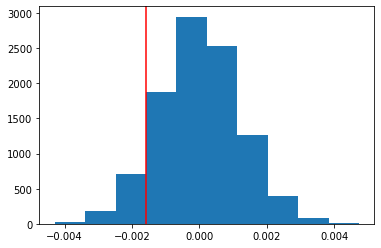

In [26]:
#plot a histogram of the p_diffs
plt.hist(p_diffs);
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
plt.axvline(x=obs_diff, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#calculate p-value
(p_diffs > obs_diff).mean()

0.9078

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- **The value calculated in part j is called p-value in scientific studies.**
- **It is the probability of obtaining the observed statistic (or one more extreme in favor of the alternative hypothesis) given the null hypothesis is true.**
- **Based on our calculation, there is 90.63% chance that we would observe the difference between $p_{new}$ and $p_{old}$ in ab_data.csv assuming the null hypothesis were true.**
- **Since the p-value, 0.9063, is greater than $\alpha$=0.05, we fail to reject the null hypothesis. There is insufficient evidence, ar the $\alpha$=0.05 level, to conclude that the new page is better than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
#calculate p-value alternatively
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
#calculate p-value alternatively
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **The value of the z-score represents how many standard deviations our data point is away from the mean.** 
- **In this case, a positive z-score of 1.31 indicates that our data point is 1.31 standard diviation above the mean difference.**
- **From the stated hypothesis, we know that we are dealing with a 1-tailed hypothesis test with an $\alpha$ level of 0.05, which gives us a critical z-score of 1.64.**
- **Since the z-score, 1.31, is not greater than 1.64, we fail to reject the null hypothesis. There is insufficient evidence, ar the $\alpha$=0.05 level, to conclude that the new page is better than the old page.**
- **The findings are consistent with parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**In this case, we will be performing logistic regression, which is used to predict two possible outcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
#regression prep
df3 = df2.copy()
df3['intercept'] = 1
df3[['ab_page_del', 'ab_page']] = pd.get_dummies(df3['group'])
df3.drop('ab_page_del', axis=1, inplace=True)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
#regression
import statsmodels.api as sm
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
#regression summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:17:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The logistic regression is two-tailed, whereas the null and alternative hypotheses in the Part II is one -tailed. The null and alternative hypotheses associated with the logistic regression model will be as following:**<br>

**\begin{equation*} H_{0}: p_{new} - p_{old} = 0 \end{equation*}**<br>
**\begin{equation*} H_{1}: p_{new} - p_{old} \neq 0 \end{equation*}**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [33]:
# duration of the experiment
duration = np.array(pd.to_datetime(df.timestamp).sort_values(ascending=True))
td = duration[-1] - duration[0]
days = td.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

21.0

**Other factors that might influence whether or not an individual converts:**
- **Novelty effect and change aversion when existing users first experience a change.**
- **Long enough run time for the experiment to account for changes in behavior based on time of day/week or seasonal events. In this case, the duration of experiment is only 21 days.**

**There can be additional factors that can be added into our regression model:**
- **Duration of the experiment.**
- **Click through rate.**
- **Project revenue.**

**However, adding more terms into the regression model may lead to more efforts to collect data and interpret the results. It may also introduce multi-collinearity to the model, in which predictor variables are correlated with one another.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
#read in contry info
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [35]:
#find unique values
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [36]:
#create the necessary dummy variables
df_new['intercept'] = 1
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.drop('US', axis=1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,CA,UK
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [37]:
#regression
log_mod_ctry = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results_ctry = log_mod_ctry.fit()
results_ctry.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        10:17:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Since the p-value for CA and UK, 0.129 and 0.456, are greater than $\alpha$=0.05, we can conclude that there is insufficient evidence, at the  𝛼 =0.05 level, the conuntry has an impact on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
### Fit Your Linear Model And Obtain the Results
df_new_intrct = df_new.copy()
df_new_intrct['page_ctry'] = df_new_intrct['landing_page'].apply(lambda x:x.split('_')[0]) + "_" + df_new_intrct['country']
df_new_intrct.head()

,country,timestamp,group,landing_page,converted,intercept,CA,UK,page_ctry
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,old_UK
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,new_US
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,new_UK
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,old_UK
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,new_UK


In [39]:
#find unique values
df_new_intrct['page_ctry'].unique()

array(['old_UK', 'new_US', 'new_UK', 'old_US', 'new_CA', 'old_CA'],
      dtype=object)

In [40]:
#obatin dummies
df_join = pd.get_dummies(df_new_intrct[['landing_page','page_ctry']], prefix='', prefix_sep='')
df_join.drop(['old_page', 'new_US', 'old_CA', 'old_UK', 'old_US'], axis=1, inplace=True)
df_new_intrct = df_new_intrct.join(df_join)
df_new_intrct.head()

,country,timestamp,group,landing_page,converted,intercept,CA,UK,page_ctry,new_page,new_CA,new_UK
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,old_UK,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,new_US,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,new_UK,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,old_UK,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,new_UK,1,0,1


In [41]:
#regression
log_mod_ctry_intrct = sm.Logit(df_new_intrct['converted'], df_new_intrct[['intercept', 'new_page', 'CA', 'UK', 'new_CA', 'new_UK']])
results_ctry_intrct = log_mod_ctry_intrct.fit()
results_ctry_intrct.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        10:17:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
new_page      -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
new_CA        -0.0469      0.054     -0.872      0.383      -0.152       0.059
new_UK         0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**Since all the p-values above are greater than $\alpha$=0.05, we fail to reject the null hypothesis and can conclude that the interaction between types of page and user conuntries have no impact on the conversion.**

<a id='conclusions'></a>
## Conclusions

Within the scope of this project, we helped the company to understand whether they should implement a new page or keep the old page with following:

- Probability based approach
- A/B test
- Regression approach

#### Probability based approach:

The probability section helped us better understand our dataset and ensure it is correct, consistent and useable. Based on the data, we found that the probability of converting given an individual was in the control group (0.1204) is higher than the probability of converting given an individual was in the treatment group (0.1188), which seems to support the conclusion that the company should keep the old page. However, without further analysis, we cannot say whether this oberservation is statistically significant or due to chance. Here A/B test and regression will come into play to help us draw conclusions.

#### A/B test:

In A/B test we set up our hypotheses to test if the new page results in better conversion or not. We performed sampling distribution over 10,000 iterations to simulate the distribution of differences in converted between the two pages under the null hypothesis, by using a random binomial distribution with specified number of trials and converted success rate. We then computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference in conversion, which is 0.9063 in this case, and hence rejected null hypothsis and conclude that the new page has no impact on conversion. By using the built-in stats.proportions_ztest we computed z-score and p-value which confirmed our earlier p-value and failure to reject null hypothesis.

#### Regression Approach:

We aimed at predicting two possible outcomes, convert or not. Therefore, logistic regression is applied in this approach. With logistic regression results, we again encountered same statistics, which verified our conclusions from A/B test. By further adding geographic location of the users, we tried to explore if any specific country had an impact on conversion. The result gave a similar outlook and suggested that the countries have no impact on the conversion rate. The same story repeated for the interaction between types of page and user conuntries, which has no impact on the conversion rate.

#### Suggestions:
Other factors that might influence whether or not an individual converts:
- Novelty effect and change aversion when existing users first experience a change.
- Long enough run time for the experiment to account for changes in behavior based on time of day/week or seasonal events. In this case, the duration of experiment is only 21 days.

Additional terms that can be added into our regression model:
- Duration of the experiment.
- Click through rate.
- Project revenue.


#### Reference
how to interpret p-value: https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/p-value-approach